This notebook contains the code required to generate Supplementary Figure 1 Hall et al. 2019.  

However, due to the long times required to generate the full figures the parameters in this notebook have been set to run in a shorter amount of time and the **plots produced will not exactly match the published figures**.  

**Comments in the code show how to change the parameters to generate the original figures**.  This would take approximately 15 minutes per simulation and requires 8000 simulations.  

In [1]:
import sys
sys.path.append('/Users/mh28/PycharmProjects/incom_paper_repo/new_clean_repo/clone-competition-simulation/')
from parameters import Parameters
from FitnessClasses import *
from simulation_scraping_disjoint import get_rsquared_all_sims
from plot_functions import plot_incomplete_moment_with_random_selection
import os
import glob

import numpy as np
np.seterr(divide='ignore')
np.seterr(invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

In [2]:
# To recreate the figures, change the variables NUM_SIMULATIONS, GRID_SIZE and BIOPSY_LOCATIONS. 
# These are marked with *CHANGE FOR FIGURES*

NUM_SIMULATIONS = 5   # Increase to 1000 to recreate the figures. *CHANGE FOR FIGURES*

# Parameters for the simulations
GRID_SIZE = 200  # Increase to 500 to recreate the figures. *CHANGE FOR FIGURES*
NUM_CELLS = GRID_SIZE ** 2
MAX_TIME = 3000

DIVISION_RATE = 0.033
MUTATION_RATE = 0.015

# Parameters for biopsy sampling
BIOPSY_EDGE = 70
BIOPSY_LOCATIONS = [0, 100]  # Use [0, 100, 200, 300, 400] to recreate the figures. *CHANGE FOR FIGURES*

BIOPSIES = []
for i in BIOPSY_LOCATIONS:
    for j in BIOPSY_LOCATIONS:
        BIOPSIES.append({'biopsy_origin': (i, j), 'biopsy_edge': BIOPSY_EDGE}, )

COVERAGE = 1000
DETECTION_LIMIT = 10
FIXED_INTERVAL = 25 # Defining the size of the bins to group the clones into. Cell number

In [3]:
def get_non_neutral_cell_proportion(sim):
    neutral_cells = 0
    non_neutral_cells = 0
    for i in range(len(sim.clones_array)):
        pop = sim.population_array[i, -1]
        if pop > 0:
            fit = sim.clones_array[i, sim.fitness_idx]
            if fit == 1:
                neutral_cells += pop
            else:
                non_neutral_cells += pop

    non_neutral_proportion = non_neutral_cells/(neutral_cells + non_neutral_cells)
    return non_neutral_proportion

In [4]:
def run_simulations(p, output_dir, label):
    print('Running simulations')
    dnds_ratios = []
    non_neutral_cell_proportions = []
    for i in range(1, NUM_SIMULATIONS+1):
        # Run a simulation
        np.random.seed(i)
        sim_2D = p.get_simulator()
        sim_2D.run_sim()
        output_file = '{}/Moran2D_{}-{}.pickle'.format(output_dir, label, i)
        sim_2D.pickle_dump(output_file)
        dnds_ratios.append(sim_2D.get_dnds())
        non_neutral_cell_proportions.append(get_non_neutral_cell_proportion(sim_2D))
        print('Completed {} of {} simulations'.format(i, NUM_SIMULATIONS))

    print('Processing simulation results')
    # This will include all simulation results in the directory.
    res = get_rsquared_all_sims(output_dir, biopsies=BIOPSIES, coverage=COVERAGE, detection_limit=DETECTION_LIMIT,
                                fixed_interval=FIXED_INTERVAL)

    plot_incomplete_moment_with_random_selection(res,
                                                 x_vals=np.arange(0, 3000, FIXED_INTERVAL),
                                                 with_biopsy=False,
                                                 convert_to_clone_size=True,
                                                 biopsy_size=NUM_CELLS,
                                                 linecolour='b',
                                                 rangecolour='b',
                                                 num_shown=min(20, NUM_SIMULATIONS))

    plot_incomplete_moment_with_random_selection(res,
                                                 x_vals=np.arange(0, 3000, FIXED_INTERVAL),
                                                 with_biopsy=True,
                                                 convert_to_clone_size=True,
                                                 biopsy_size=BIOPSY_EDGE**2,
                                                 linecolour='r',
                                                 rangecolour='r',
                                                 num_shown=min(20, NUM_SIMULATIONS)
                                                )
    plt.show()

# Exponential distribution of fitness effects

## Exponential - 1% non-neutral simulations

In [5]:
# Supplementary Figure 1a

============== Setting up ==============
Using a grid of 200x200
3960000 simulation_steps
Running simulations
Completed 1 of 5 simulations
Completed 2 of 5 simulations
Completed 3 of 5 simulations
Completed 4 of 5 simulations
Completed 5 of 5 simulations
Processing simulation results


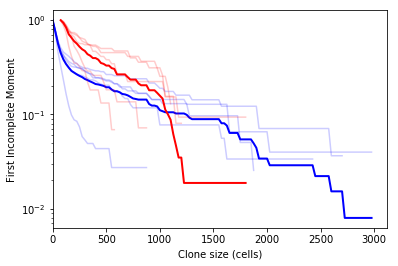

In [6]:
# Set up a directory to store the output of the simulations.
output_dir = 'exponential_non_neutral_1perc_simulations'
empty_dir = True
try:
    os.mkdir(output_dir)
    
except FileExistsError as e:
    for f in glob.glob("{}/*.pickle".format(output_dir)):
        print('.pickle files already exist in the {} directory. Remove before running.'.format(output_dir))
        empty_dir = False
        break

if empty_dir:
    # Define the synonymous proportion and fitness effect of the mutations added
    mutation_generator = MutationGenerator(combine_mutations='add',
                                               mutation_distribution=ExponentialDist(0.1, offset=1), 
                                               synonymous_proportion=0.99)

    # Set up the parameters for the simulations
    p = Parameters(algorithm='Moran2D', mutation_generator=mutation_generator,
                      initial_cells=NUM_CELLS,
                      division_rate=DIVISION_RATE, max_time=MAX_TIME,
                      mutation_rate=MUTATION_RATE, samples=10)

    run_simulations(p, output_dir, 'exp_1perc')

## Exponential - 25% non-neutral simulations

In [7]:
# Supplementary Figure 1b

============== Setting up ==============
Using a grid of 200x200
3960000 simulation_steps
Running simulations
Completed 1 of 5 simulations
Completed 2 of 5 simulations
Completed 3 of 5 simulations
Completed 4 of 5 simulations
Completed 5 of 5 simulations
Processing simulation results


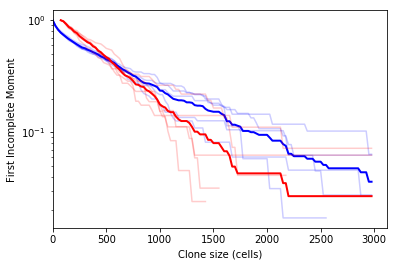

In [8]:
# Set up a directory to store the output of the simulations.
output_dir = 'exponential_non_neutral_25perc_simulations'
empty_dir = True
try:
    os.mkdir(output_dir)
    
except FileExistsError as e:
    for f in glob.glob("{}/*.pickle".format(output_dir)):
        print('.pickle files already exist in the {} directory. Remove before running.'.format(output_dir))
        empty_dir = False
        break

if empty_dir:
    # Define the synonymous proportion and fitness effect of the mutations added
    mutation_generator = MutationGenerator(combine_mutations='add',
                                               mutation_distribution=ExponentialDist(0.1, offset=1), 
                                               synonymous_proportion=0.75)

    # Set up the parameters for the simulations
    p = Parameters(algorithm='Moran2D', mutation_generator=mutation_generator,
                      initial_cells=NUM_CELLS,
                      division_rate=DIVISION_RATE, max_time=MAX_TIME,
                      mutation_rate=MUTATION_RATE, samples=10)

    run_simulations(p, output_dir, 'exp_25perc')

# Uniform distribution of fitness effects

## Uniform - 1% non-neutral simulations

In [9]:
# Supplementary Figure 1c

============== Setting up ==============
Using a grid of 200x200
3960000 simulation_steps
Running simulations
Completed 1 of 5 simulations
Completed 2 of 5 simulations
Completed 3 of 5 simulations
Completed 4 of 5 simulations
Completed 5 of 5 simulations
Processing simulation results


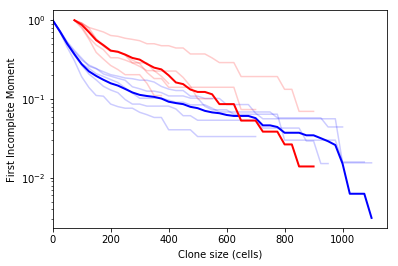

In [10]:
# Set up a directory to store the output of the simulations.
output_dir = 'uniform_non_neutral_1perc_simulations'
empty_dir = True
try:
    os.mkdir(output_dir)
except FileExistsError as e:
    for f in glob.glob("{}/*.pickle".format(output_dir)):
        print('.pickle files already exist in the {} directory. Remove before running.'.format(output_dir))
        empty_dir = False
        
if empty_dir:
    # Define the synonymous proportion and fitness effect of the mutations added
    mutation_generator = MutationGenerator(combine_mutations='add',
                                               mutation_distribution=UniformDist(1, 1.2), 
                                               synonymous_proportion=0.99)

    # Set up the parameters for the simulations
    p = Parameters(algorithm='Moran2D', mutation_generator=mutation_generator,
                   initial_cells=NUM_CELLS,
                   division_rate=DIVISION_RATE, max_time=MAX_TIME,
                   mutation_rate=MUTATION_RATE, samples=10)

    run_simulations(p, output_dir, 'uni_1perc')

## Uniform - 25% non-neutral simulations

In [11]:
# Supplementary Figure 1d

============== Setting up ==============
Using a grid of 200x200
3960000 simulation_steps
Running simulations
Completed 1 of 5 simulations
Completed 2 of 5 simulations
Completed 3 of 5 simulations
Completed 4 of 5 simulations
Completed 5 of 5 simulations
Processing simulation results


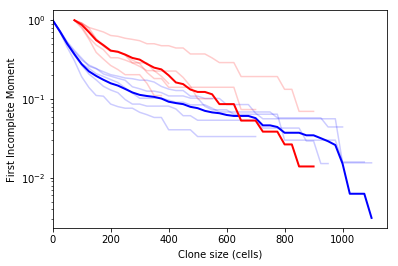

In [12]:
# Set up a directory to store the output of the simulations.
output_dir = 'uniform_non_neutral_25perc_simulations'
empty_dir = True
try:
    os.mkdir(output_dir)
except FileExistsError as e:
    for f in glob.glob("{}/*.pickle".format(output_dir)):
        print('.pickle files already exist in the {} directory. Remove before running.'.format(output_dir))
        empty_dir = False
        
if empty_dir:
    # Define the synonymous proportion and fitness effect of the mutations added
    mutation_generator = MutationGenerator(combine_mutations='add',
                                               mutation_distribution=UniformDist(1, 1.2), 
                                               synonymous_proportion=0.99)

    # Set up the parameters for the simulations
    p = Parameters(algorithm='Moran2D', mutation_generator=mutation_generator,
                   initial_cells=NUM_CELLS,
                   division_rate=DIVISION_RATE, max_time=MAX_TIME,
                   mutation_rate=MUTATION_RATE, samples=10)

    run_simulations(p, output_dir, 'uni_1perc')

# More deleterious simulations

# More deleterious

In [13]:
d1 = NormalDist(mean=1.1, std=0.1)  # Mostly beneficial mutations
d2 = NormalDist(mean=0.7, std=0.1)  # Mostly deleterious mutations
proportions = [1/3, 2/3]
mixed_mutation_distribution = MixedDist([d1, d2], proportions)

# More deleterious - 3% non-neutral

In [14]:
# Supplementary Figure 1e

In [15]:
# 3% non-neutral means 1% come from the mostly beneficial distribution.

============== Setting up ==============
Using a grid of 200x200
3960000 simulation_steps
Running simulations
Completed 1 of 5 simulations
Completed 2 of 5 simulations
Completed 3 of 5 simulations
Completed 4 of 5 simulations
Completed 5 of 5 simulations
Processing simulation results


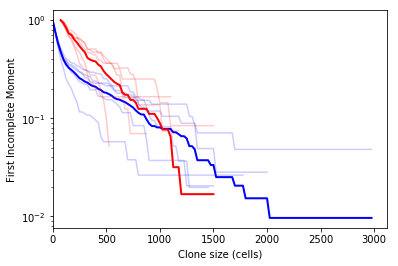

In [16]:
# Set up a directory to store the output of the simulations.
output_dir = 'more_deleterious_3perc_simulations'
empty_dir = True
try:
    os.mkdir(output_dir)
except FileExistsError as e:
    for f in glob.glob("{}/*.pickle".format(output_dir)):
        print('.pickle files already exist in the {} directory. Remove before running.'.format(output_dir))
        empty_dir = False
    
if empty_dir:
    # Define the synonymous proportion and fitness effect of the mutations added
    # The non-synonymous mutations in this case have no effect on fitness but allow the calculation of a dnds ratio
    mutation_generator = MutationGenerator(combine_mutations='add',
                                               mutation_distribution=mixed_mutation_distribution,
                                               synonymous_proportion=0.97)

    p = Parameters(algorithm='Moran2D', mutation_generator=mutation_generator,
                           initial_cells=NUM_CELLS,
                           division_rate=DIVISION_RATE, max_time=MAX_TIME,
                           mutation_rate=MUTATION_RATE, samples=10)

    run_simulations(p, output_dir, 'more_del_3perc')

# More deleterious - 75% non-neutral

In [17]:
# Supplementary Figure 1f

In [18]:
# 75% non-neutral means 25% come from the mostly beneficial distribution.

============== Setting up ==============
Using a grid of 200x200
3960000 simulation_steps
Running simulations
Completed 1 of 5 simulations
Completed 2 of 5 simulations
Completed 3 of 5 simulations
Completed 4 of 5 simulations
Completed 5 of 5 simulations
Processing simulation results


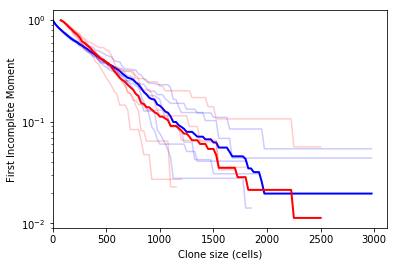

In [19]:
# Set up a directory to store the output of the simulations.
output_dir = 'more_deleterious_75perc_simulations'
empty_dir = True
try:
    os.mkdir(output_dir)
except FileExistsError as e:
    for f in glob.glob("{}/*.pickle".format(output_dir)):
        print('.pickle files already exist in the {} directory. Remove before running.'.format(output_dir))
        empty_dir = False
    
if empty_dir:
    # Define the synonymous proportion and fitness effect of the mutations added
    # The non-synonymous mutations in this case have no effect on fitness but allow the calculation of a dnds ratio
    mutation_generator = MutationGenerator(combine_mutations='add',
                                               mutation_distribution=mixed_mutation_distribution,
                                               synonymous_proportion=0.25)

    p = Parameters(algorithm='Moran2D', mutation_generator=mutation_generator,
                           initial_cells=NUM_CELLS,
                           division_rate=DIVISION_RATE, max_time=MAX_TIME,
                           mutation_rate=MUTATION_RATE, samples=10)

    run_simulations(p, output_dir, 'more_del_75perc')

# Diminishing returns simulations

## Diminishing returns - 1% non-neutral

In [20]:
# Supplementary Figure 1g

============== Setting up ==============
Using a grid of 200x200
3960000 simulation_steps
Running simulations
Completed 1 of 5 simulations
Completed 2 of 5 simulations
Completed 3 of 5 simulations
Completed 4 of 5 simulations
Completed 5 of 5 simulations
Processing simulation results


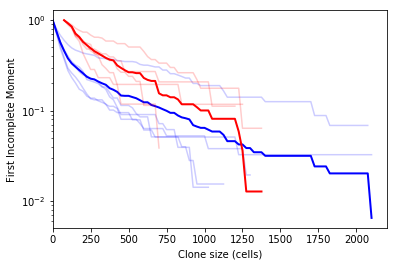

In [21]:
# Set up a directory to store the output of the simulations.
output_dir = 'diminishing_1perc_simulations'
empty_dir = True
try:
    os.mkdir(output_dir)
except FileExistsError as e:
    for f in glob.glob("{}/*.pickle".format(output_dir)):
        print('.pickle files already exist in the {} directory. Remove before running.'.format(output_dir))
        empty_dir = False
    
if empty_dir:
    # Define the synonymous proportion and fitness effect of the mutations added
    # The non-synonymous mutations in this case have no effect on fitness but allow the calculation of a dnds ratio
    mutation_generator = MutationGenerator(combine_mutations='replace_lower',
                                               mutation_distribution=NormalDist(std=0.1, mean=1.1), 
                                               synonymous_proportion=0.99)

    p = Parameters(algorithm='Moran2D', mutation_generator=mutation_generator,
                   initial_cells=NUM_CELLS,
                   division_rate=DIVISION_RATE, max_time=MAX_TIME,
                   mutation_rate=MUTATION_RATE, samples=10)

    run_simulations(p, output_dir, 'diminishing_1perc')

## Diminishing returns - 25% non-neutral

In [22]:
# Supplementary Figure 1h

============== Setting up ==============
Using a grid of 200x200
3960000 simulation_steps
Running simulations
Completed 1 of 5 simulations
Completed 2 of 5 simulations
Completed 3 of 5 simulations
Completed 4 of 5 simulations
Completed 5 of 5 simulations
Processing simulation results


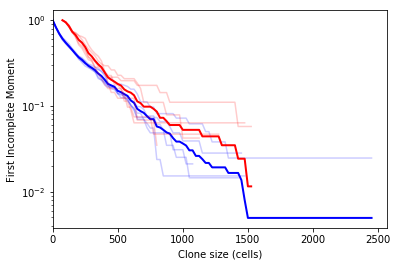

In [23]:
# Set up a directory to store the output of the simulations.
output_dir = 'diminishing_25perc_simulations'
empty_dir = True
try:
    os.mkdir(output_dir)
except FileExistsError as e:
    for f in glob.glob("{}/*.pickle".format(output_dir)):
        print('.pickle files already exist in the {} directory. Remove before running.'.format(output_dir))
        empty_dir = False
    
if empty_dir:
    # Define the synonymous proportion and fitness effect of the mutations added
    # The non-synonymous mutations in this case have no effect on fitness but allow the calculation of a dnds ratio
    mutation_generator = MutationGenerator(combine_mutations='replace_lower',
                                               mutation_distribution=NormalDist(std=0.1, mean=1.1), 
                                               synonymous_proportion=0.75)

    p = Parameters(algorithm='Moran2D', mutation_generator=mutation_generator,
                   initial_cells=NUM_CELLS,
                   division_rate=DIVISION_RATE, max_time=MAX_TIME,
                   mutation_rate=MUTATION_RATE, samples=10)

    run_simulations(p, output_dir, 'diminishing_25perc')